### MOVIES CORRELATION WITH PYTHON

### Import libraries and read the data

In [1]:
import numpy as np
import pandas as pd

# For data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the configuration of the plots to be created
from matplotlib.pyplot import figure
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_rows', None)
              
# Read the data
df = pd.read_csv(r'C:\Users\juand\Desktop\Projects\Movies Correlation - PYTHON\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Data Cleaning and Transformations

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


#### Checking the percentage of the null values in the dataset

In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


####  Drop NAs values, considering that they represents a small percentage of the dataset

In [4]:
df.dropna(inplace=True) 

#### Adjusting data types


In [5]:

df.budget = df.budget.astype('int64')
df.gross = df.gross.astype('int64')
df.votes = df.votes.astype('int64')

#### Split the released column into released_date and realeased_country


In [6]:

df['released_date'] = df.released.str.split('(', expand=True)[0]
df.released_date = pd.to_datetime(df.released_date)
df.year = df.released_date.dt.year

df['released_country'] = df.released.str.split('(', expand=True)[1]
df.released_country = df.released_country.str.split(')', expand=True)[0]

df = df.drop('released', axis=1)

df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


#### Rename the 'not rated' values in the rating column to 'unrated'


In [7]:
df.rating = df.rating.str.replace('Not Rated', 'Unrated')

### Exploratory Data Analysis (EDA)

#### 1. What are the top 5 movies by gross revenue?

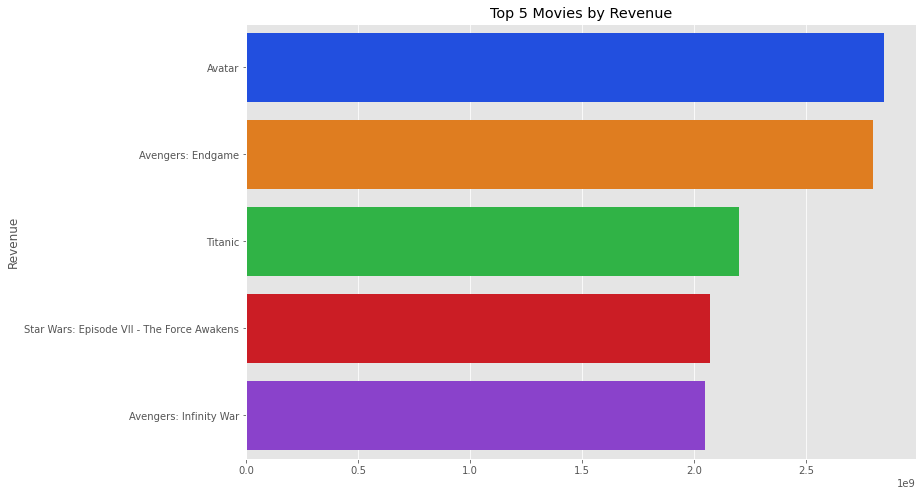

In [8]:
top5 = df.sort_values(by='gross', ascending=False).head()

sns.barplot(x='gross', y='name', data=top5, palette='bright')
plt.xlabel('')
plt.ylabel('Revenue')
plt.title('Top 5 Movies by Revenue')
plt.show()

#### 2. What are the stars and directors that made the most movies?

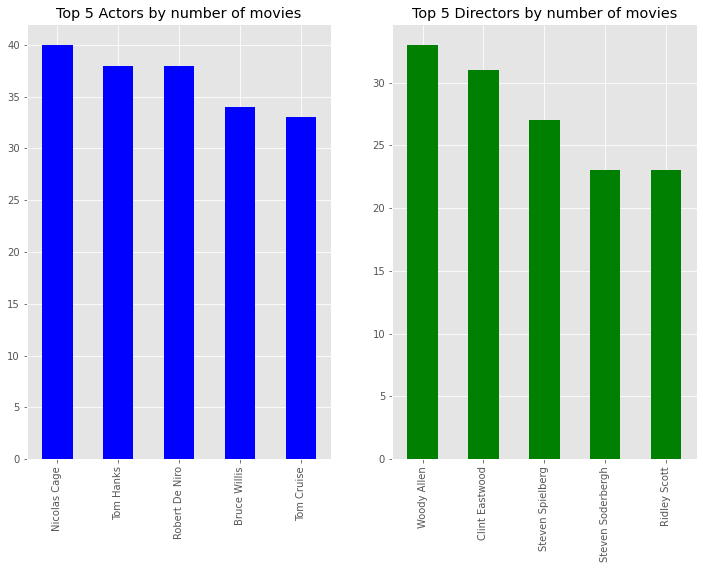

In [9]:
star = df.star.value_counts().head()
director = df.director.value_counts().head()

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
star.plot(kind='bar', ax=ax1, color='b', title='Top 5 Actors by number of movies')
director.plot(kind='bar', ax=ax2, color='g', title='Top 5 Directors by number of movies')
plt.show()

#### 3. What are the directors that have generated the most revenues?

Text(0.5, 1.0, 'Top 5 Directors by Revenue')

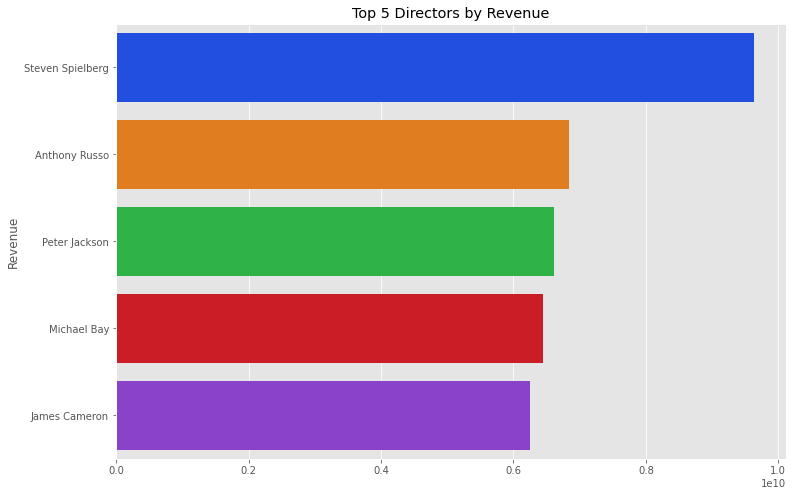

In [10]:
director_rev = df.groupby('director').sum().sort_values(by='gross', ascending=False).head()

sns.barplot(x='gross', y=director_rev.index, data=director_rev, palette='bright')
plt.xlabel('')
plt.ylabel('Revenue')
plt.title('Top 5 Directors by Revenue')


#### 4. What is the volume of movies coming out per year?

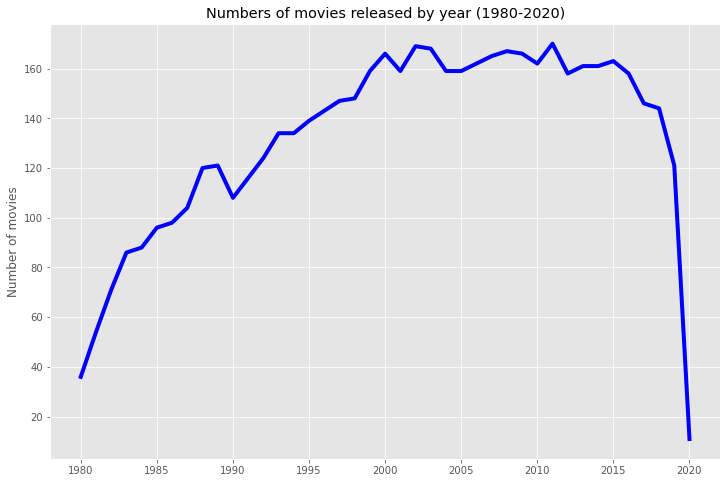

In [11]:
released_year = df.groupby('year').count()
sns.lineplot(x=released_year.index, y='name', data=released_year, linewidth=4, color='b')
plt.xlabel('')
plt.ylabel('Number of movies')
plt.title('Numbers of movies released by year (1980-2020)')
plt.show()

#### What are the best movies by score?

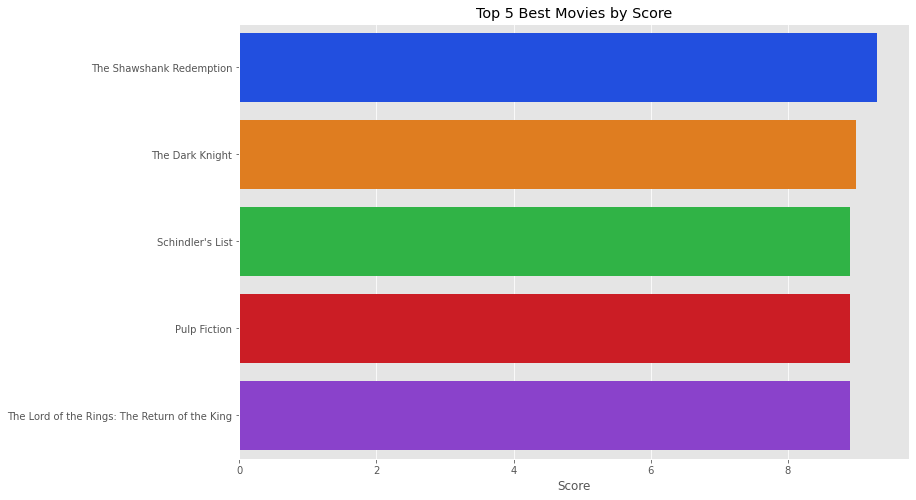

In [12]:
best_movies = df.sort_values(by='score', ascending=False).head(5)

sns.barplot(x='score', y='name', data=best_movies, palette='bright')
plt.xlabel('Score')
plt.ylabel('')
plt.title('Top 5 Best Movies by Score')
plt.show()

### Correlation Analysis

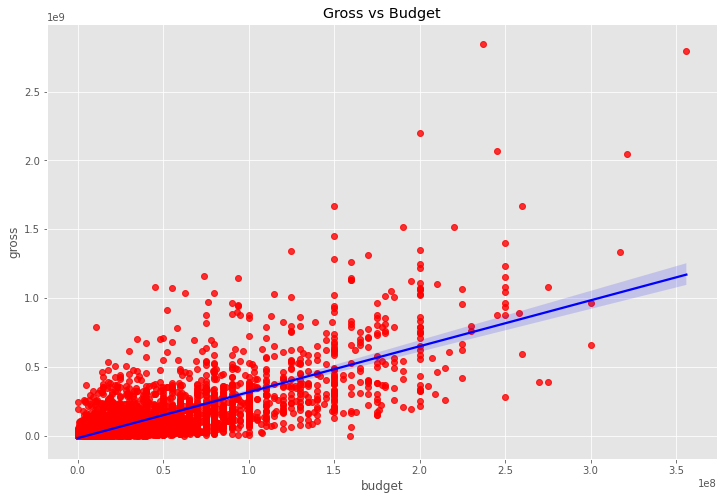

In [13]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('Gross vs Budget')
plt.show()

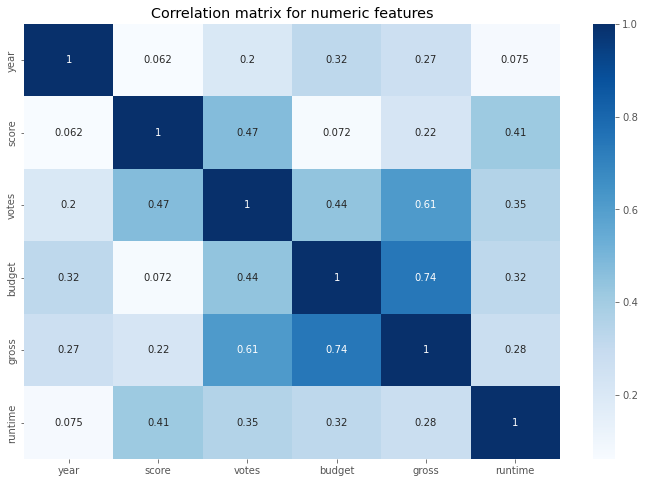

In [14]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation matrix for numeric features')

plt.show()

#### Checking the high correlations

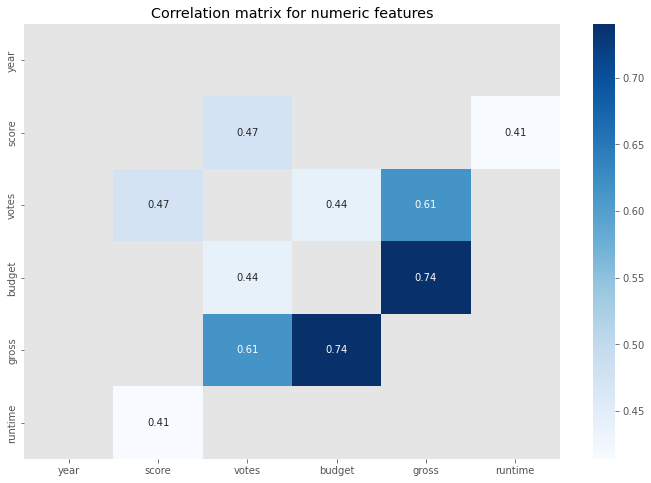

In [15]:
x = correlation_matrix[((correlation_matrix) > .4) & ((correlation_matrix) != 1)]

sns.heatmap(x, annot=True, cmap='Blues')
plt.title('Correlation matrix for numeric features')

plt.show()

### Insights

#### From the results obtained in the linear regression plot and the correlation study, it can be seen that:
1. There is a great relationship between the budget assigned to a movies and the gross generated by it.
2. There is a directly proportional relationship between the budget and gross.

Likewise, it can be seen that the number of votes assigned to a movie contributes positively to gorssand the final score. Finally, it can be noted that movies with a longer runtime tend to obtain a higher score.

